# Helping Donors Choose Donorschoose.org
<p style="font-size:18px"> A Kernel Submission to the Data Science for Good Kaggle Competition with Donorschoose.org </p>
<img src="donorschoose-image.png" alt="DonorsChoose.org" width="500" height="200">

## About DonorsChoose.org

## About the Data

## Questions we would like to ask

## Results of Analysis

### Initialization & Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from collections import OrderedDict
from sklearn.preprocessing import LabelEncoder

In [2]:
filepath = '/Users/tristan.j.alba/Google Drive/ds_projects/datascience/'
df = pd.read_csv(filepath+'consolidated_df_sampled.csv').iloc[:,1:]

### Data Wrangling: Label Encoding

In [3]:
features = df.columns
features

Index(['Project ID', 'Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 'Resource Item Name',
       'Resource Quantity', 'Resource Unit Price', 'Resource Vendor Name',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
       'School ID', 'Teacher ID', 'Teacher Project Posted Sequence',
       'Project Type', 'Project Title', 'Project Essay',
       'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Teacher Prefix',
       'Teacher First Project Posted Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School C

#### Identifying useful features and categorical variables

In [121]:
not_useful = ['Project ID', 'Donation ID','Donor ID','Donation Included Optional Donation',
          'Donor Cart Sequence','Resource Vendor Name','Resource Item Name', 
              'Teacher Project Posted Sequence','School ID', 'Teacher ID',
          'Project Title', 'Project Essay','Project Short Description',
          'Project Need Statement','School Name']

date_feat = ['Donation Received Date','Project Posted Date', 'Project Expiration Date',
        'Project Fully Funded Date','Teacher First Project Posted Date']

donor_feat = ['Donation ID', 'Donor ID',
       'Donation Included Optional Donation', 'Donation Amount',
       'Donor Cart Sequence', 'Donation Received Date', 
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip']

project_feat = ['Resource Item Name',
       'Resource Quantity', 'Resource Unit Price', 'Resource Vendor Name',
       'Project Type', 'Project Title', 'Project Essay',
       'Project Short Description', 'Project Need Statement',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Posted Date', 'Project Expiration Date',
       'Project Current Status', 'Project Fully Funded Date', 'Teacher Prefix',
       'Teacher First Project Posted Date', 'School Name', 'School Metro Type',
       'School Percentage Free Lunch', 'School State', 'School Zip',
       'School City', 'School County', 'School District']

cat_feat = ['Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
            'Project Type','Project Subject Category Tree', 
            'Project Subject Subcategory Tree',
            'Project Grade Level Category', 'Project Resource Category',
            'Project Current Status','Teacher Prefix','School Metro Type',
            'School State', 'School Zip','School City','School County', 'School District']
            
            

#### Dropping not so useful features

In [5]:
df_new = df.drop(labels=not_useful,axis = 1)

#### Dropping datetime features (for now)

In [6]:
df_new = df_new.drop(labels=date_feat,axis = 1)

In [7]:
cat_feat_new = []
for x in df_new.columns.tolist(): 
    if x in cat_feat:
        cat_feat_new.append(x)

#### Dropping NaN values

In [8]:
df_new.dropna(axis=0, inplace=True)
#df_new[pd.isnull(df_new).any(axis=1)]

#### Encoding numerical labels into categorical variables

In [9]:
checker1 = df_new[df_new['School State']=='Alaska'].index.tolist()
checker2 = df_new[df_new['School Metro Type']=='town'].index.tolist()

In [10]:
labels = {}
for cat_feat_new in cat_feat_new:
    le = LabelEncoder()
    le.fit(df_new[cat_feat_new].value_counts().index.values)
    
    if df_new[cat_feat_new].dtype == 'float64' or\
    df_new[cat_feat_new].dtype == 'int':
        df_new[cat_feat_new] = le.transform(df_new[cat_feat_new])
    
    else:
        df_new[cat_feat_new] = le.transform(df_new[cat_feat_new].astype(str))
    
    labels[cat_feat_new] = list(le.classes_)

#### Checking whether label encoding is done properly

In [11]:
check = 0 

for i in checker1:
    if df_new['School State'].loc[i] != 1: check += 1

for i in checker2:
    if df_new['School Metro Type'].loc[i] != 2: check += 1
        
if check==0: print('Label Encoding Success') 
else: print('Label Encoding Error')

Label Encoding Success


#### Randomly sampling an arbitrary number of datapoints for initial analysis

In [12]:
n_rows = 50000
df_ = df_new.sample(n = n_rows, random_state = 123, axis = 0)
X = df_

### KMeans Clustering

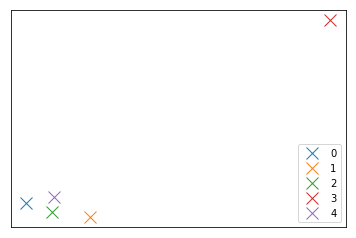

In [13]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5).fit(X)
for i in range(len(kmeans.cluster_centers_)):
    plt.plot(kmeans.cluster_centers_[i][0],kmeans.cluster_centers_[i][1],'x', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend(loc=4)

**Observations:** `n_clusters = 5` generates the most ideal separation among clusters from `n_clusters 1-10`

#### Storing Donor ID in corresponding clusters

In [14]:
cluster0 = df.iloc[X.iloc[kmeans.labels_==0,:].index]['Donor ID']
cluster1 = df.iloc[X.iloc[kmeans.labels_==1,:].index]['Donor ID']
cluster2 = df.iloc[X.iloc[kmeans.labels_==2,:].index]['Donor ID']
cluster3 = df.iloc[X.iloc[kmeans.labels_==3,:].index]['Donor ID']
cluster4 = df.iloc[X.iloc[kmeans.labels_==4,:].index]['Donor ID']

In [15]:
y = kmeans.labels_

### KNearest Neighbors Classification

In [16]:
X.columns

Index(['Donation Amount', 'Resource Quantity', 'Resource Unit Price',
       'Donor City', 'Donor State', 'Donor Is Teacher', 'Donor Zip',
       'Project Type', 'Project Subject Category Tree',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
       'Teacher Prefix', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District'],
      dtype='object')

In [17]:
X_clf = X[['Project Type', 'Project Subject Category Tree',
       'Project Subject Subcategory Tree', 'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
       'Teacher Prefix', 'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District']]

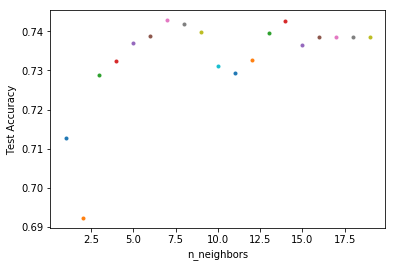

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y, test_size = 0.25, 
                                                    random_state = 123)
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,20,1):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    plt.plot(n,clf.score(X_test, y_test),'.')
    plt.xlabel("n_neighbors")
    plt.ylabel("Test Accuracy")


**Observations:** It appears that `n_neighbors = y` yields the highest test accuracy at around 74.2%

0.74288


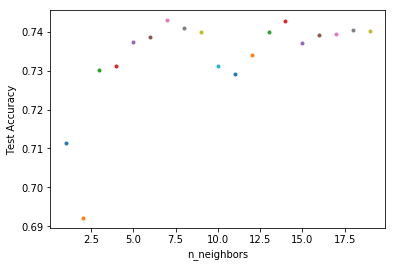

In [21]:
X_clf_ = X[['Project Type', 'Project Subject Category Tree',
            'Project Grade Level Category',
       'Project Resource Category', 'Project Cost', 'Project Current Status',
        'School Metro Type', 'School Percentage Free Lunch',
       'School State', 'School Zip', 'School City', 'School County',
       'School District']]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf_, y, test_size = 0.25, 
                                                    random_state = 123)
from sklearn.neighbors import KNeighborsClassifier
for n in range(1,20,1):
    clf = KNeighborsClassifier(n_neighbors = n).fit(X_train, y_train)
    plt.plot(n,clf.score(X_test, y_test),'.')
    plt.xlabel("n_neighbors")
    plt.ylabel("Test Accuracy")
    
print(KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train).score(X_test, y_test))

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_clf, y, test_size = 0.25, 
                                                    random_state = 123)
dtc = DecisionTreeClassifier().fit(X_train, y_train)
dtc.score(X_test,y_test)

0.75544

# Clustering Projects

#### Creating a new `df_proj` dataframe

In [122]:
df_proj =pd.DataFrame()
df_proj = df.drop(labels=date_feat,axis = 1)

#### Selecting features for projects

In [123]:
for x in df_proj.columns.tolist():
    if x in donor_feat:
        df_proj.drop(labels=x, axis=1, inplace=True)
    elif x in not_useful:
        df_proj.drop(labels=x, axis=1, inplace=True)

#### Populating the list of categorical variables for the new dataframe

In [124]:
cat_feat_proj = []
for x in df_proj.columns.tolist(): 
    if x in cat_feat:
        cat_feat_proj.append(x)

#### Dropping NaN values

In [125]:
df_proj.dropna(axis=0, inplace=True)
#df_proj[pd.isnull(df_new).any(axis=1)]

In [126]:
df_proj.columns

Index(['Resource Quantity', 'Resource Unit Price', 'Project Type',
       'Project Subject Category Tree', 'Project Subject Subcategory Tree',
       'Project Grade Level Category', 'Project Resource Category',
       'Project Cost', 'Project Current Status', 'Teacher Prefix',
       'School Metro Type', 'School Percentage Free Lunch', 'School State',
       'School Zip', 'School City', 'School County', 'School District'],
      dtype='object')

#### Encoding numerical labels into categorical variables

In [127]:
checker1 = df_proj[df_proj['School State']=='Alaska'].index.tolist()
checker2 = df_proj[df_proj['School Metro Type']=='town'].index.tolist()

In [128]:
labels_proj = {}
for cat_feat_proj in cat_feat_proj:
    le = LabelEncoder()
    le.fit(df_proj[cat_feat_proj].value_counts().index.values)
    
    if df_proj[cat_feat_proj].dtype == 'float64' or\
    df_proj[cat_feat_proj].dtype == 'int':
        df_proj[cat_feat_proj] = le.transform(df_proj[cat_feat_proj])
    
    else:
        df_proj[cat_feat_proj] = le.transform(df_proj[cat_feat_proj].astype(str))
    
    labels_proj[cat_feat_proj] = list(le.classes_)

#### Checking whether label encoding is done properly

In [157]:
check = 0 

for i in checker1:
    if df_proj['School State'].loc[i] != 1: check += 1

for i in checker2:
    if df_proj['School Metro Type'].loc[i] != 2: check += 1
        
if check==0: print('Label Encoding Success') 
else: print('Label Encoding Error')

KeyError: 'the label [5884] is not in the [index]'

#### Randomly sampling an arbitrary number of datapoints for initial analysis

In [131]:
n_rows = 50000
df_proj_ = df_proj.sample(n = n_rows, random_state = 123, axis = 0)
X = df_proj_

### KMeans Clustering: Projects Data

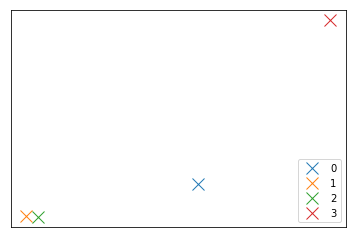

In [135]:
from sklearn.cluster import KMeans
kmeans_proj = KMeans(n_clusters = 4).fit(X)
for i in range(len(kmeans_proj.cluster_centers_)):
    plt.plot(kmeans_proj.cluster_centers_[i][0],kmeans_proj.cluster_centers_[i][1],'x', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend(loc=4)

**Observations:** `n_clusters = 4` generates the most ideal separation among clusters from `n_clusters 1-10`

#### Storing Project ID in corresponding clusters

In [137]:
cluster0 = df.iloc[X.iloc[kmeans_proj.labels_==0,:].index]['Project ID']
cluster1 = df.iloc[X.iloc[kmeans_proj.labels_==1,:].index]['Project ID']
cluster2 = df.iloc[X.iloc[kmeans_proj.labels_==2,:].index]['Project ID']
cluster3 = df.iloc[X.iloc[kmeans_proj.labels_==3,:].index]['Project ID']

In [145]:
df['School State'].iloc[cluster0.index].value_counts()

Indiana           1443
New York           726
California         541
New Jersey         413
Florida            408
Texas              322
Massachusetts      257
Michigan           219
Montana            126
North Carolina     123
Maryland           106
Illinois           104
Mississippi         88
Ohio                78
Alabama             66
Connecticut         62
Arizona             50
Missouri            47
Pennsylvania        45
Georgia             35
Wisconsin           31
Washington          29
South Carolina      23
Virginia            20
Colorado            19
Oklahoma            19
Tennessee           18
Oregon              17
Louisiana           11
Hawaii               9
Kansas               6
Idaho                5
Utah                 3
Kentucky             2
Name: School State, dtype: int64

In [147]:
y = kmeans_proj.labels_

# Clustering Donations

#### Creating a new `df_don` dataframe

In [165]:
df_don =pd.DataFrame()
df_don = df.drop(labels=date_feat,axis = 1)

#### Selecting features for donations

In [166]:
for x in df_don.columns.tolist():
    if x in project_feat:
        df_don.drop(labels=x, axis=1, inplace=True)
    elif x in not_useful:
        df_don.drop(labels=x, axis=1, inplace=True)

#### Populating the list of categorical variables for the new dataframe

In [167]:
cat_feat_don = []
for x in df_don.columns.tolist(): 
    if x in cat_feat:
        cat_feat_don.append(x)

#### Dropping NaN values

In [168]:
df_don.dropna(axis=0, inplace=True)
#df_proj[pd.isnull(df_new).any(axis=1)]

In [169]:
df_don.columns

Index(['Donation Amount', 'Donor City', 'Donor State', 'Donor Is Teacher',
       'Donor Zip'],
      dtype='object')

#### Encoding numerical labels into categorical variables

In [170]:
checker1 = df_don[df_don['Donor State']=='Alaska'].index.tolist()
checker2 = df_don[df_don['Donor City']=='Aberdeen'].index.tolist()

In [171]:
labels_don = {}
for cat_feat_don in cat_feat_don:
    le = LabelEncoder()
    le.fit(df_don[cat_feat_don].value_counts().index.values)
    
    if df_don[cat_feat_don].dtype == 'float64' or\
    df_don[cat_feat_don].dtype == 'int':
        df_don[cat_feat_don] = le.transform(df_don[cat_feat_don])
    
    else:
        df_don[cat_feat_don] = le.transform(df_don[cat_feat_don].astype(str))
    
    labels_don[cat_feat_don] = list(le.classes_)

#### Checking whether label encoding is done properly

In [172]:
check = 0 

for i in checker1:
    if df_don['Donor State'].loc[i] != 1: check += 1

for i in checker2:
    if df_don['Donor City'].loc[i] != 1: check += 1
        
if check==0: print('Label Encoding Success') 
else: print('Label Encoding Error')

Label Encoding Success


#### Randomly sampling an arbitrary number of datapoints for initial analysis

In [175]:
n_rows = 50000
df_don_ = df_don.sample(n = n_rows, random_state = 123, axis = 0)
X = df_don_

### KMeans Clustering: Donations Data

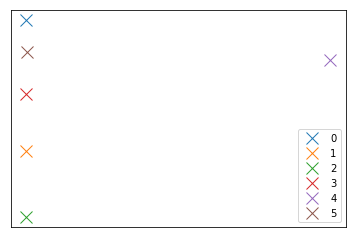

In [184]:
from sklearn.cluster import KMeans
kmeans_don = KMeans(n_clusters =6).fit(X)
for i in range(len(kmeans_don.cluster_centers_)):
    plt.plot(kmeans_don.cluster_centers_[i][0],kmeans_don.cluster_centers_[i][1],'x', markersize=12, label=i);
    plt.xticks([], [])
    plt.yticks([], [])
    plt.legend(loc=4)

**Observations:** `n_clusters = 6` generates the most ideal separation among clusters from `n_clusters 1-10`

#### Storing Donor ID in corresponding clusters

In [185]:
cluster0 = df.iloc[X.iloc[kmeans_don.labels_==0,:].index]['Donor ID']
cluster1 = df.iloc[X.iloc[kmeans_don.labels_==1,:].index]['Donor ID']
cluster2 = df.iloc[X.iloc[kmeans_don.labels_==2,:].index]['Donor ID']
cluster3 = df.iloc[X.iloc[kmeans_don.labels_==3,:].index]['Donor ID']
cluster4 = df.iloc[X.iloc[kmeans_don.labels_==4,:].index]['Donor ID']
cluster5 = df.iloc[X.iloc[kmeans_don.labels_==5,:].index]['Donor ID']
